In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [29]:
df = pd.read_csv('Final.csv')

In [30]:
df.columns

Index(['movie_id', 'Crime', 'Drama', 'Comedy', 'Action', 'Thriller',
       'Adventure', 'Science Fiction', 'Animation', 'Family', 'Romance',
       'Mystery', 'Music', 'Horror', 'Fantasy', 'Documentary', 'War',
       'Western', 'History', 'Foreign', 'TV Movie', 'imdb_id', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'revenue', 'budget',
       'Cast 1', 'Cast 2', 'Production', 'Month', 'Year', 'Error'],
      dtype='object')

In [31]:
df.drop(['movie_id','imdb_id','Year','Error','release_date'], axis=1, inplace =True)

In [32]:
df.isnull().sum()


Crime              0
Drama              0
Comedy             0
Action             0
Thriller           0
Adventure          0
Science Fiction    0
Animation          0
Family             0
Romance            0
Mystery            0
Music              0
Horror             0
Fantasy            0
Documentary        0
War                0
Western            0
History            0
Foreign            0
TV Movie           0
popularity         0
vote_average       0
vote_count         0
revenue            0
budget             0
Cast 1             0
Cast 2             0
Production         0
Month              0
dtype: int64

In [20]:
df = pd.get_dummies(data = df, columns = ['Month'], drop_first=True)

In [22]:
df.isnull().sum()

Crime              0
Drama              0
Comedy             0
Action             0
Thriller           0
Adventure          0
Science Fiction    0
Animation          0
Family             0
Romance            0
Mystery            0
Music              0
Horror             0
Fantasy            0
Documentary        0
War                0
Western            0
History            0
Foreign            0
TV Movie           0
popularity         0
release_date       0
vote_average       0
vote_count         0
revenue            0
budget             0
Cast 1             0
Cast 2             0
Production         0
Month_2            0
Month_3            0
Month_4            0
Month_5            0
Month_6            0
Month_7            0
Month_8            0
Month_9            0
Month_10           0
Month_11           0
Month_12           0
dtype: int64

# OLS 

In [63]:
from statsmodels.tools.tools import add_constant
X = df.drop('revenue',axis=1)
y = df.revenue
col_to_std = X.nunique()[X.nunique()>10].index.to_list() 
#standardizing: 
X[col_to_std] = (X[col_to_std]-X[col_to_std].mean())/X[col_to_std].std()
y= (y-y.mean())/y.std()
X = add_constant(X)


In [64]:
model = sm.OLS(y,X.astype(int)).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     651.1
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:21:08   Log-Likelihood:                -13907.
No. Observations:               13912   AIC:                         2.787e+04
Df Residuals:                   13883   BIC:                         2.809e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2704      0.031     -8.694      0.000      -0.331      -0.209
Crime              -0.0572      0.016     -3.614      0.000      -0.088      -0.026
Drama              -0.1925      0.013    -14.293      0.000      -0.219      -0.166
Comedy             -0.0468      0.014     -3.270      0.001      -0.075      -0.019
Action              0.1387      0.015      9.173      0.000       0.109       0.168
Thriller           -0.0361      0.014     -2.505      0.012      -0.064      -0.008
Adventure           0.2604      0.017     15.054      0.000       0.226       0.294
Science Fiction    -0.0605      0.019     -3.237      0.001      -0.097      -0.024
Animation           0.2990      0.033      8.988      0.000       0.234       0.364
Family              0.2281      0.025      9.067      0.000       0.179       0.277
Romance             0.0824      0.016      5.299      0.000       0.052       0.113
Mystery            -0.0010      0.020     -0.049      0.961      -0.040       0.038
Music               0.0805      0.037      2.190      0.029       0.008       0.153
Horror             -0.0597      0.022     -2.755      0.006      -0.102      -0.017
Fantasy             0.2175      0.021     10.566      0.000       0.177       0.258
Documentary        -0.0962      0.100     -0.966      0.334      -0.291       0.099
War                -0.0073      0.031     -0.232      0.817      -0.069       0.054
Western            -0.2777      0.042     -6.556      0.000      -0.361      -0.195
History             0.0236      0.029      0.811      0.418      -0.033       0.081
Foreign            -0.3041      0.129     -2.352      0.019      -0.558      -0.051
TV Movie           -0.2066      0.466     -0.443      0.658      -1.121       0.708
popularity          0.1093      0.007     16.018      0.000       0.096       0.123
vote_average        0.0160      0.009      1.839      0.066      -0.001       0.033
vote_count          0.8167      0.009     92.345      0.000       0.799       0.834
budget             -0.0043      0.006     -0.763      0.445      -0.015       0.007
Cast 1              0.0567      0.014      4.178      0.000       0.030       0.083
Cast 2             -0.0114      0.020     -0.586      0.558      -0.050       0.027
Production          0.0329      0.006      5.959      0.000       0.022       0.044
Month               0.0870      0.009      9.656      0.000       0.069       0.105
==============================================================================
Omnibus:                     8168.624   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           279843.293
Skew:                           2.248   Prob(JB):                         0.00
Kurtosis:                      24.507   Cond. No.                         224.


#### -> low R square, some of the variables has high p-value

### Checking OLS assumption: 

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# Vif is used to check multicolinearity

In [67]:
VIF_result1 = pd.Series([vif(X.astype(int).values,i) for i in range(X.shape[1])],index=X.columns)
VIF_result1[VIF_result1>10]

const    31.065662
dtype: float64

#### -> no multicolinearilty

In [69]:
#Prediction:
ypred=model.predict(X)

In [70]:
from scipy.stats import pearsonr
pearsonr(ypred,y)[0]

0.8006210845838012

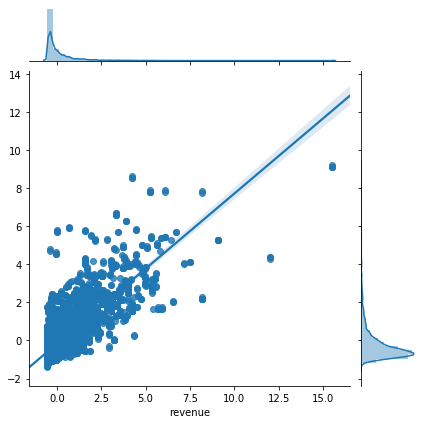

In [73]:
import seaborn as sns
sns.jointplot(y,ypred, kind='reg')

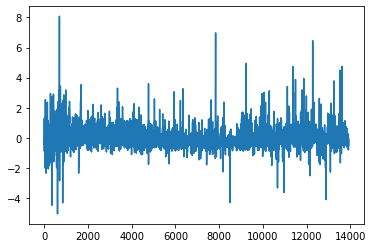

In [72]:
import matplotlib.pyplot as plt
plt.plot(model.resid)

In [41]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [42]:
sms.jarque_bera(model.resid)

(82278.37352336984, 0.0, 2.440420535640875, 25.912982885268615)

In [44]:
sms.het_breuschpagan(model.resid, model.model.exog)

(609.0703093100485,
 1.5287254144500244e-112,
 30.337060982388778,
 6.612592440140445e-125)

# RFE

In [40]:
df1.revenue1.hist(bins=5)

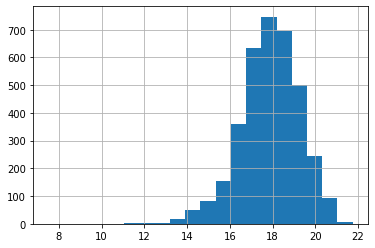

In [41]:
np.log(df1.revenue1).hist(bins=20)

In [42]:
y = np.log(df1.revenue1)
y= round((y-y.mean())/y.std(), 2)
y.shape

(3598,)

In [43]:
X = df1.drop('revenue1', axis =1)
X.shape

(3598, 40)

In [44]:
X.budget1= round(np.log(df1.budget1),2)
X.popularity=round(X.popularity, 2)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [45]:
reg = LinearRegression()
rfe = RFE(reg,15)

In [46]:
rfe = rfe.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# OLS - spliting test and train

In [52]:
from sklearn.model_selection import train_test_split

In [148]:
df1.astype(int, inplace=True)

,const,Production,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,4,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,4,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,1,4,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
5,1,4,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,4,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,1,4,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
8,1,4,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
9,1,4,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [149]:
col_to_std = df1.nunique()[df1.nunique()>10].index.to_list() 
df1[col_to_std] = (df1[col_to_std]-df1[col_to_std].mean())/df1[col_to_std].std()
df1 = add_constant(df1)

In [150]:
X_train, X_test, y_train, y_test= train_test_split(df1.drop('revenue1', axis =1), df1.revenue1, 
                                                   test_size=0.3, random_state=11)

In [151]:
import statsmodels.api as sm

In [153]:
model = sm.OLS(y_train,X_train.astype(int))

In [154]:
model = model.fit()

In [155]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenue1   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     135.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:14:47   Log-Likelihood:                -2026.8
No. Observations:                2518   AIC:                             4132.
Df Residuals:                    2479   BIC:                             4359.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5861      0.063     -9.316      0.000      -0.709      -0.463
Production          0.0354      0.010      3.510      0.000       0.016       0.055
Animation           0.3289      0.058      5.640      0.000       0.215       0.443
Comedy             -0.0570      0.028     -2.004      0.045      -0.113      -0.001
Family              0.0975      0.043      2.284      0.022       0.014       0.181
Adventure           0.1224      0.035      3.539      0.000       0.055       0.190
Fantasy             0.0649      0.038      1.721      0.085      -0.009       0.139
Romance             0.1252      0.031      3.990      0.000       0.064       0.187
Drama              -0.1596      0.028     -5.743      0.000      -0.214      -0.105
Action              0.0360      0.031      1.151      0.250      -0.025       0.097
Crime              -0.0329      0.034     -0.980      0.327      -0.099       0.033
Thriller           -0.0293      0.031     -0.940      0.347      -0.090       0.032
Horror             -0.0189      0.041     -0.467      0.640      -0.098       0.061
History             0.0159      0.069      0.230      0.818      -0.120       0.152
Science Fiction    -0.1072      0.038     -2.785      0.005      -0.183      -0.032
Mystery             0.0103      0.043      0.240      0.810      -0.074       0.094
War                 0.0853      0.071      1.210      0.227      -0.053       0.224
Music               0.1010      0.061      1.669      0.095      -0.018       0.220
Foreign            -0.1006      0.210     -0.479      0.632      -0.512       0.311
Western            -0.2558      0.095     -2.705      0.007      -0.441      -0.070
Documentary        -0.1577      0.115     -1.369      0.171      -0.383       0.068
TV Movie        -1.166e-16   2.48e-16     -0.469      0.639   -6.04e-16    3.71e-16
budget1             0.5538      0.021     26.349      0.000       0.513       0.595
Cast 1              0.1008      0.023      4.463      0.000       0.057       0.145
Cast 2              0.0886      0.024      3.646      0.000       0.041       0.136
adult            2.078e-17   4.24e-17      0.490      0.625   -6.25e-17    1.04e-16
popularity          0.0672      0.012      5.822      0.000       0.045       0.090
vote_average        0.0399      0.018      2.211      0.027       0.005       0.075
vote_count          0.5525      0.019     29.729      0.000       0.516       0.589
Age                -0.1074      0.017     -6.429      0.000      -0.140      -0.075
Month_2             0.0097      0.062      0.157      0.876      -0.112       0.131
Month_3             0.0252      0.060      0.420      0.675      -0.092       0.143
Month_4             0.0836      0.060      1.389      0.165      -0.034       0.202
Month_5             0.1309      0.060      2.198      0.028

In [156]:
def reg(X,y=y_train):
    model=sm.OLS(y,X.astype(int))
    model_fit = model.fit()
    print(model_fit.summary())

In [157]:
X_train=X_train.drop('Comedy', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:09   Log-Likelihood:                -2028.9
No. Observations:                2518   AIC:                             4134.
Df Residuals:                    2480   BIC:                             4355.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6277      0.059    -

In [158]:
X_train=X_train.drop('Fantasy', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:10   Log-Likelihood:                -2030.6
No. Observations:                2518   AIC:                             4135.
Df Residuals:                    2481   BIC:                             4351.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6230      0.059    -

In [159]:
X_train=X_train.drop('Action', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     146.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:10   Log-Likelihood:                -2031.6
No. Observations:                2518   AIC:                             4135.
Df Residuals:                    2482   BIC:                             4345.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6126      0.059    -

In [160]:
X_train=X_train.drop('Horror', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     150.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:10   Log-Likelihood:                -2031.7
No. Observations:                2518   AIC:                             4133.
Df Residuals:                    2483   BIC:                             4337.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6152      0.057    -

In [161]:
X_train=X_train.drop(['Mystery','War','Music'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     164.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:11   Log-Likelihood:                -2034.2
No. Observations:                2518   AIC:                             4132.
Df Residuals:                    2486   BIC:                             4319.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6069      0.057    -

In [162]:
X_train=X_train.drop('Foreign', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     170.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:11   Log-Likelihood:                -2034.3
No. Observations:                2518   AIC:                             4131.
Df Residuals:                    2487   BIC:                             4311.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6089      0.057    -

In [163]:
X_train=X_train.drop(['Cast 1','Cast 2'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:11   Log-Likelihood:                -2055.4
No. Observations:                2518   AIC:                             4169.
Df Residuals:                    2489   BIC:                             4338.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4584      0.053     

In [164]:
X_train=X_train.drop(['TV Movie'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:12   Log-Likelihood:                -2055.4
No. Observations:                2518   AIC:                             4169.
Df Residuals:                    2489   BIC:                             4338.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4584      0.053     

In [165]:
X_train=X_train.drop(['Production'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:12   Log-Likelihood:                -2063.7
No. Observations:                2518   AIC:                             4183.
Df Residuals:                    2490   BIC:                             4347.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3769      0.049     

In [174]:
X_train=X_train.drop(['Month_3','Month_4','Month_8','Month_9','Month_10'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     235.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:18:40   Log-Likelihood:                -2066.1
No. Observations:                2518   AIC:                             4176.
Df Residuals:                    2496   BIC:                             4304.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3304      0.024    -

In [175]:
X_train=X_train.drop(['adult'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     235.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:19:16   Log-Likelihood:                -2066.1
No. Observations:                2518   AIC:                             4176.
Df Residuals:                    2496   BIC:                             4304.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3304      0.024    -

In [176]:
X_train=X_train.drop(['Crime','Thriller','History'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     274.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:20:10   Log-Likelihood:                -2066.5
No. Observations:                2518   AIC:                             4171.
Df Residuals:                    2499   BIC:                             4282.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3267      0.021    -

In [177]:
model=sm.OLS(y_train,X_train.astype(int))
model_fit = model.fit()

In [178]:
X_train.columns

Index(['const', 'Animation', 'Family', 'Adventure', 'Romance', 'Drama',
       'Science Fiction', 'Western', 'Documentary', 'budget1', 'popularity',
       'vote_average', 'vote_count', 'Age', 'Month_5', 'Month_6', 'Month_7',
       'Month_11', 'Month_12'],
      dtype='object')

In [180]:
X_test = X_test[['const', 'Animation', 'Family', 'Adventure', 'Romance', 'Drama',
       'Science Fiction', 'Western', 'Documentary', 'budget1', 'popularity',
       'vote_average', 'vote_count', 'Age', 'Month_5', 'Month_6', 'Month_7',
       'Month_11', 'Month_12']]

In [181]:
pred=model_fit.predict(X_test)

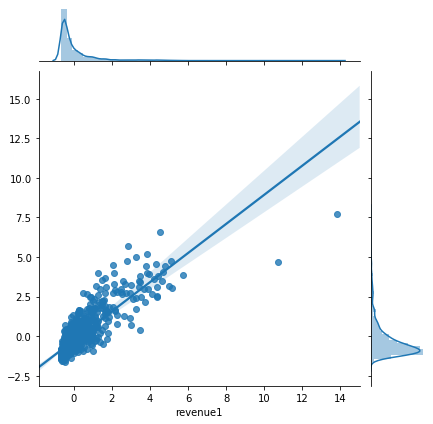

In [182]:
sns.jointplot(y_test,pred, kind='reg')